# 36.尺取り法1、区間和

### ABC229 D Dif:745
url : https://atcoder.jp/contests/abc229/tasks/abc229_D

### [概要]
尺取法は最近よく出題される。考え方は簡単だが自力で思いつくのはなかなか難しいテクニッ  
ク。実装は慣れれば簡単。この問題で考え方を理解し、自力で実装できるようになろう。  
累積和を使った区間和の高速計算も非常によく使うテクニック。  
この2つができなければ緑コーダーになることはできない。気合をいれて頑張ろう。  
### [解説]
まずSのi文字目までにいくつの「.」が含まれるかを計算したリストを作る。ある区間にある「.」の数  
はこのリストからO(1)で計算できる。  
ある区間[l,r]についてK回以下の操作により全ての文字を「X」に変えられるのであれば  
[l,r-1],[l,r-2],...とそれより狭い区間も当然に全ての文字を「X」に変えることができる。このことから  
尺取法を使い、最も長い区間をO(N)で計算できる。  
「尺取法」  
左右のインデックス番号を条件に合わせて動かしながら区間の長さ等を計算するアルゴリズム。  
本問の場合は以下の手順で行う。  
(1)左端=lを1、右端=rを1とする  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
・できる場合  
右端=rを進める(+1する)  
・できない場合  
[l,r-1]の区間の長さ=r-lを計算し、それまでの答えより大きければ更新  
左端=lを進める(+1する)  
(3)rが文字数を超えるまで(2)を繰り返す  
<br>
～例～  
S：XX...X.X.X.  
K：2  
まずSのi文字目までにいくつ「.」があるかを記録するリストCountを作る。pythonでは文字列の左  
端は0文字目となるが、あえて1文字目として数える。(実装時は0文字目を「?」等てきとうな文字  
で埋める)  

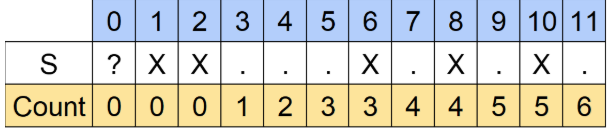  

例えばCount[4]=2となっているがこれはSの1文字目～4文字目=「XX..」に「.」が2個あることを示
している。  
Countを使うと任意の区間について「.」がいくつあるかを簡単に計算できる。l文字目～r文字目ま  
での「.」の個数というのは(1文字目～r文字目までの「.」の個数)-(1文字目～(l-1)文字目までの  
「.」の個数)で計算できるから、  
区間[l,r]の「.」の個数=Count[r]-Count[l-1]  
となるわけだ。  
例えば区間[4,9]の「.」の個数なら  
Count[9]-Count[4-1]  
=Count[9]-Count[3]  
=5-1  
=4  
となる。  
次に尺取法を使って答えを確認していく。  
(1)左端=lを1、右端=rを1とする  
l：1  
r：1  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
区間[1,1]の「.」の個数は0個だからできる。  
この場合は右端=rを進める(+1する)  
l：1  
r：2  
(3)rが文字数を超えるまで(2)を繰り返す  
(2)へ戻る  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
区間[1,2]の「.」の個数は0個だからできる。  
右端=rを進める(+1する)  
l：1  
r：3  
(3)rが文字数を超えるまで(2)を繰り返す  
(2)へ戻る  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
区間[1,3]の「.」の個数は1個だからできる。  
右端=rを進める(+1する)  
l：1  
r：3  
(3)rが文字数を超えるまで(2)を繰り返す  
(2)へ戻る  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
区間[1,4]の「.」の個数は2個だからできる。  
右端=rを進める(+1する)  
l：1  
r：4  
(3)rが文字数を超えるまで(2)を繰り返す  
(2)へ戻る  
(2)[l,r]についてK回以下の操作で全ての文字を「X」とできるか確認する  
区間[1,5]の「.」の個数は3個だからできない。  
この場合、区間[l,r-1]=[1,4]までは全て「X」とできるわけだから区間[1,4]の長さ(r-l)=4を暫定の答  
えとして記録する。  
さらに左端=lを進める(+1する)。  
ここで右端はいちいち戻らなくても良い。区間[1,4]は全て「X」とできたのだから[2,3]や[2,4]は計  
算しなくても当然に全て「X」とできるからだ。  
l：2  
r：5  
以下も同じことを繰り返し、r=12となったら(Sの文字数を超えたら)終了する。  
l,rはどちらも1,2,3,...を最大で一回ずつしか通らないから全体の計算量はO(N)となる。  
### [実装のコツ]

<「.」の累積個数の数え方>  
まずSの0文字目を「?」等てきとうな文字で埋めよう。  
i=1,2,3,...についてCountは  
・S[i]=「X」ならば  
Count[i]=Count[i-1](一つ左と同じ)  
・S[i]=「.」ならば  
Count[i]=Count[i-1]+1(一つ左+1)  
と計算していけば累積個数を計算できる。  

<尺取法>  
尺取法は固定する区間の左端をforで、右端をwhileで処理するとうまくいく。  
左を固定して右を動かし、右の動きが止まったら(区間[l,r]が全て「X」にできなかったら)左を動か  
すというイメージ。  
尺取法は基本的にこの書き方で実装できるので、この問題で自力で書けるようになろう  

```
# 右
r=1
# l=1~(N-1)
for l in range(1,N):
    # r<Nの間
    while r<N:
        # [左,右]にある「.」の数=Count[r]-Count[l-1]
        Period=Count[r]-Count[l-1]
        # [左,右]にある「.」の数≤Kならば
        # ⇔[左,右]にある「.」を全て「X」に変えられるなら
        if Period<=K:
            # 右を移動
            r+=1
            # そうでないなら([左,右]にある「.」を全て「X」に変えられないなら)
        else:
            # whileを抜ける
            break
    # [左,右-1]の長さを計算し、今までの答えより大きければ更新
    ans=max(ans,r-l)

```

In [ ]:
# 入力の受け取り
S=input()
K=int(input())

S="?"+S

# Sの長さ
N=len(S)

# 「.」の累積個数
Count=[0]*N

# i=1~(N-1)
for i in range(1,N):
    # S[i]=「X」ならば
    if S[i]=="X":
        # 一つ左と同じ
        Count[i]=Count[i-1]
    # そうでないなら(S[i]=「.」)
    else:
        # 一つ左+1
        Count[i]=Count[i-1]+1

# 答え
ans=0

# 右
r=1

# l=1~(N-1)
for l in range(1,N):
    # r<Nの間
    while r<N:
        # [左,右]にある「.」の数=Count[r]-Count[l-1]
        Period=Count[r]-Count[l-1]

        # [左,右]にある「.」の数≤Kならば
        # ⇔[左,右]にある「.」を全て「X」に変えられるなら
        if Period<=K:
            # 右を移動
            r+=1
        # そうでないなら([左,右]にある「.」を全て「X」に変えられないなら)
        else:
            # whileを抜ける
            break

    # [左,右-1]の長さを計算し、今までの答えより大きければ更新
    ans=max(ans,r-l)

# 答えの出力
print(ans)
